In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

In [44]:
col_name = [
    'Profile factor', 'Symmetry', 'Crossflow', 'Flow Velocity P1',
    'Flow Velocity P2', 'Flow Velocity P3', 'Flow Velocity P4',
    'Speed of Sound P1', 'Speed of Sound P2', 'Speed of Sound P3',
    'Speed of Sound P4', 'Signal Strength P1T', 'Signal Strength P1R',
    'Signal Strength P2T', 'Signal Strength P2R', 'Signal Strength P3T',
    'Signal Strength P3R', 'Signal Strength P4T', 'Signal Strength P4R',
    'Signal Quality P1T', 'Signal Quality P1R', 'Signal Quality P2T',
    'Signal Quality P2R', 'Signal Quality P3T', 'Signal Quality P3R',
    'Signal Quality P4T', 'Signal Quality P4R', 'Gain P1T', 'Gain P1R',
    'Gain P2T', 'Gain P2R', 'Gain P3T', 'Gain P3R', 'Gain P4T', 'Gain P4R',
    'Transit Time P1T', 'Transit Time P1R', 'Transit Time P2T',
    'Transit Time P2R', 'Transit Time P3T', 'Transit Time P3R',
    'Transit Time P4T', 'Transit Time P4R', 'Class'
]

col_name_noclass = [
    'Profile factor', 'Symmetry', 'Crossflow', 'Flow Velocity P1',
    'Flow Velocity P2', 'Flow Velocity P3', 'Flow Velocity P4',
    'Speed of Sound P1', 'Speed of Sound P2', 'Speed of Sound P3',
    'Speed of Sound P4', 'Signal Strength P1T', 'Signal Strength P1R',
    'Signal Strength P2T', 'Signal Strength P2R', 'Signal Strength P3T',
    'Signal Strength P3R', 'Signal Strength P4T', 'Signal Strength P4R',
    'Signal Quality P1T', 'Signal Quality P1R', 'Signal Quality P2T',
    'Signal Quality P2R', 'Signal Quality P3T', 'Signal Quality P3R',
    'Signal Quality P4T', 'Signal Quality P4R', 'Gain P1T', 'Gain P1R',
    'Gain P2T', 'Gain P2R', 'Gain P3T', 'Gain P3R', 'Gain P4T', 'Gain P4R',
    'Transit Time P1T', 'Transit Time P1R', 'Transit Time P2T',
    'Transit Time P2R', 'Transit Time P3T', 'Transit Time P3R',
    'Transit Time P4T', 'Transit Time P4R'
]

In [3]:
df_dataset_b = pd.read_csv('df_median_b',
                 header='infer',
                 index_col=[0],
                 sep='\t')

In [4]:
df_dataset_b.reset_index(inplace=True)
df_dataset_b = df_dataset_b.drop(['index'],axis=1)
# df_dataset_b = df_dataset_b.drop(['level_0'],axis=1)
print()
df_dataset_b

,Profile factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Average Flow Velocity,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Average Speed of Sound,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Turbulence P1,Turbulence P2,Turbulence P3,Turbulence P4,Meter Performance,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
0,1.185089,1.028128,1.016478,0.150000,2.195744,2.540944,2.511961,2.087889,2.394439,1483.869833,1486.382167,1485.372056,1484.989000,1485.153222,5260.655556,5067.588889,4977.822222,4984.077778,5170.311111,5200.205556,4111.527778,4291.850000,9.038944,4.426833,4.504556,9.241222,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.107067,84.003098,120.338783,120.144244,120.371772,120.179078,84.019053,83.919971,1
1,1.191806,1.033750,1.019411,0.217000,2.192467,2.546594,2.516744,2.075706,2.396089,1483.747389,1486.259222,1485.250333,1484.867056,1485.030722,5256.227778,5065.400000,4978.022222,4981.433333,5172.344444,5200.816667,4107.144444,4286.327778,9.030167,4.284000,4.597500,9.166444,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.114116,84.009973,120.349089,120.153889,120.381700,120.188800,84.025607,83.927260,1
2,1.181983,1.028089,1.020994,0.088900,3.246672,3.738378,3.715217,3.079356,3.523517,1483.777056,1486.288222,1485.281000,1484.898889,1485.061111,5278.550000,5002.900000,4971.044444,4958.055556,5146.377778,5179.372222,4039.272222,4302.883333,9.780722,4.612000,4.544778,10.231167,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.137487,83.983336,120.392450,120.106206,120.425422,120.140578,84.047809,83.901593,1
3,1.182761,1.028783,1.021072,0.117000,3.244489,3.741861,3.718839,3.080400,3.525933,1483.847444,1486.357167,1485.350444,1484.970167,1485.131278,5276.144444,4994.794444,4973.305556,4956.305556,5149.922222,5175.688889,4036.355556,4297.377778,9.749389,4.835333,4.749278,10.945056,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.133493,83.979407,120.387033,120.100444,120.419883,120.134933,84.043715,83.897597,1
4,1.182272,1.028922,1.021350,0.022200,3.245944,3.742217,3.715456,3.080950,3.525128,1483.819056,1486.328444,1485.320500,1484.944333,1485.103278,5272.716667,4993.561111,4969.877778,4952.244444,5147.422222,5174.011111,4035.338889,4297.572222,9.602333,4.479889,4.716833,9.984056,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.135354,83.980807,120.389361,120.102800,120.422050,120.137472,84.045346,83.898959,1
5,1.177961,1.030906,1.019450,0.016700,3.255339,3.745594,3.707656,3.090322,3.526094,1483.780056,1486.289667,1485.282333,1484.903667,1485.063889,5270.022222,4994.744444,4968.261111,4951.883333,5144.100000,5173.155556,4036.144444,4298.977778,10.125278,4.779000,4.788556,10.832333,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.137602,

In [5]:
df_dataset_d = pd.read_csv('df_median_d',
                 header='infer',
                 index_col=[0],
                 sep='\t')

In [21]:
print(df_dataset_d.shape)
df_dataset_d

(151, 44)


,Profile factor,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
0,1.104706,1.004679,0.994783,2.345833,2.604444,2.580000,2.347222,1485.805556,1485.930556,1485.941667,1485.780556,66.000000,66.000000,66.000000,66.000000,65.000000,65.000000,66.000000,66.000000,3543.972222,3457.944444,3367.583333,3401.805556,3711.222222,3707.138889,3643.555556,3590.777778,0.500000,0.500000,0.200000,0.200000,1.400000,1.400000,-0.700000,-0.700000,124.150000,123.911944,151.615833,151.275000,151.559444,151.221111,124.253611,124.017778,1
1,1.089401,0.997778,0.998012,3.399444,3.711111,3.711944,3.414444,1486.163889,1486.302778,1486.302778,1486.130556,66.000000,66.000000,66.000000,66.000000,65.000000,65.000000,66.000000,66.000000,3546.805556,3412.583333,3256.666667,3322.277778,3716.055556,3670.777778,3622.222222,3580.305556,0.500000,0.500000,0.200000,0.200000,1.400000,1.400000,-0.700000,-0.700000,124.171944,123.831667,151.652222,151.164444,151.595278,151.113333,124.274167,123.937778,1
2,1.079671,1.006056,0.999027,3.438056,3.714722,3.689722,3.420000,1486.322222,1486.452778,1486.455556,1486.297222,66.000000,66.000000,66.000000,66.000000,65.000000,65.000000,66.000000,66.000000,3557.277778,3413.333333,3267.000000,3330.722222,3693.666667,3677.583333,3620.027778,3574.083333,0.500000,0.500000,0.200000,0.200000,1.400000,1.400000,-0.700000,-0.700000,124.160000,123.818056,151.636111,151.150833,151.580000,151.096944,124.260833,123.923611,1
3,1.090834,1.013194,0.994911,3.399444,3.725000,3.660556,3.371111,1486.455556,1486.575000,1486.583333,1486.416667,66.000000,66.000000,66.000000,66.000000,65.000000,65.000000,66.000000,66.000000,3541.111111,3433.666667,3262.000000,3329.611111,3702.055556,3677.194444,3635.027778,3579.694444,0.500000,0.500000,0.200000,0.200000,1.400000,1.400000,-0.700000,-0.700000,124.144722,123.808611,151.622500,151.139167,151.564167,151.084167,124.250833,123.913056,1
4,1.093816,1.009716,1.003622,3.398889,3.702778,3.681389,3.351944,1486.600000,1486.725000,1486.730556,1486.555556,66.000000,66.000000,66.000000,66.000000,65.000000,65.000000,66.000000,66.000000,3541.333333,3416.888889,3273.472222,3320.833333,3690.138889,3690.500000,3615.833333,3564.972222,0.500000,0.500000,0.200000,0.200000,1.400000,1.400000,-0.700000,-0.700000,124.134444,123.797500,151.607500,151.122778,151.550278,151.068889,124.236111,123.903056,1
5,1.083782,1.002271,0.989495,3.393611,3.716667,3.671111,3.423056,1486.763889,1486.875000,1486.891667,1486.711111,66.000000,66.000000,66.000000,66.000000,65.000000,65.000000,66.000000,66.000000,3558.361111,3435.722222,3253.416667,3341.888889,3709.555556,3672.611111,3628.250000,3576.250000,0.500000,0.500000,0.200000,0.200000,1.400000,1.400000,-0.700000,-0.700000,124.120278,123.784722,151.593056,151.106944,151.533056,151.053889,124.223333,123.890556,1
6,1.102778,1.001920,1.015187,3.404444,3.697778,3.744444,3.344167,1486.908333,1487.027778,1487.022222,1486.866667,66.000000,66.000000,66.000000,66.000000,65.000000,65.000000,66.000000,66.000000,3549.194444,3429.111111,3267.638889,3327.611111,3692.833333,3687.361111,3625.555556,3589.000000,0.500000,0.500000,0.200000,0.200000,1.400000,1.400000,-0.700000,-0.700000,124.109167,123.771389,151.575278,151.093056,151.522222,151.035833,124.212500,123.876111,1
7,1.088536,1.002219,0.994138,4.131944,4.523889,4.488889,4.147778,1487.811111,1487.944444,1487.933333,1487.769444,66.000000,66.00

# Merge B into D
drop Swirl angle, Average flow velocity in all four paths, Average Speed of Sound, Turbulence in each of the four paths,  Meter performance,  

In [11]:
C_D = df_dataset_b.drop(['Swirl Angle'],axis=1)
C_D = C_D.drop(['Average Flow Velocity'],axis=1)
C_D = C_D.drop(['Average Speed of Sound'],axis=1)
C_D = C_D.drop(['Turbulence P1'],axis=1)
C_D = C_D.drop(['Turbulence P2'],axis=1)
C_D = C_D.drop(['Turbulence P3'],axis=1)
C_D = C_D.drop(['Turbulence P4'],axis=1)
C_D = C_D.drop(['Meter Performance'],axis=1)

In [23]:
C_D.shape

(66, 44)

In [24]:
merge = df_dataset_d.append(C_D)

In [26]:

print(merge.shape)
print(df_dataset_b.shape)

(217, 44)
(66, 52)


In [25]:
merge

,Profile factor,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
0,1.104706,1.004679,0.994783,2.345833,2.604444,2.580000,2.347222,1485.805556,1485.930556,1485.941667,1485.780556,66.000000,66.000000,66.000000,66.000000,65.000000,65.000000,66.000000,66.000000,3543.972222,3457.944444,3367.583333,3401.805556,3711.222222,3707.138889,3643.555556,3590.777778,0.500000,0.500000,0.200000,0.200000,1.400000,1.400000,-0.700000,-0.700000,124.150000,123.911944,151.615833,151.275000,151.559444,151.221111,124.253611,124.017778,1
1,1.089401,0.997778,0.998012,3.399444,3.711111,3.711944,3.414444,1486.163889,1486.302778,1486.302778,1486.130556,66.000000,66.000000,66.000000,66.000000,65.000000,65.000000,66.000000,66.000000,3546.805556,3412.583333,3256.666667,3322.277778,3716.055556,3670.777778,3622.222222,3580.305556,0.500000,0.500000,0.200000,0.200000,1.400000,1.400000,-0.700000,-0.700000,124.171944,123.831667,151.652222,151.164444,151.595278,151.113333,124.274167,123.937778,1
2,1.079671,1.006056,0.999027,3.438056,3.714722,3.689722,3.420000,1486.322222,1486.452778,1486.455556,1486.297222,66.000000,66.000000,66.000000,66.000000,65.000000,65.000000,66.000000,66.000000,3557.277778,3413.333333,3267.000000,3330.722222,3693.666667,3677.583333,3620.027778,3574.083333,0.500000,0.500000,0.200000,0.200000,1.400000,1.400000,-0.700000,-0.700000,124.160000,123.818056,151.636111,151.150833,151.580000,151.096944,124.260833,123.923611,1
3,1.090834,1.013194,0.994911,3.399444,3.725000,3.660556,3.371111,1486.455556,1486.575000,1486.583333,1486.416667,66.000000,66.000000,66.000000,66.000000,65.000000,65.000000,66.000000,66.000000,3541.111111,3433.666667,3262.000000,3329.611111,3702.055556,3677.194444,3635.027778,3579.694444,0.500000,0.500000,0.200000,0.200000,1.400000,1.400000,-0.700000,-0.700000,124.144722,123.808611,151.622500,151.139167,151.564167,151.084167,124.250833,123.913056,1
4,1.093816,1.009716,1.003622,3.398889,3.702778,3.681389,3.351944,1486.600000,1486.725000,1486.730556,1486.555556,66.000000,66.000000,66.000000,66.000000,65.000000,65.000000,66.000000,66.000000,3541.333333,3416.888889,3273.472222,3320.833333,3690.138889,3690.500000,3615.833333,3564.972222,0.500000,0.500000,0.200000,0.200000,1.400000,1.400000,-0.700000,-0.700000,124.134444,123.797500,151.607500,151.122778,151.550278,151.068889,124.236111,123.903056,1
5,1.083782,1.002271,0.989495,3.393611,3.716667,3.671111,3.423056,1486.763889,1486.875000,1486.891667,1486.711111,66.000000,66.000000,66.000000,66.000000,65.000000,65.000000,66.000000,66.000000,3558.361111,3435.722222,3253.416667,3341.888889,3709.555556,3672.611111,3628.250000,3576.250000,0.500000,0.500000,0.200000,0.200000,1.400000,1.400000,-0.700000,-0.700000,124.120278,123.784722,151.593056,151.106944,151.533056,151.053889,124.223333,123.890556,1
6,1.102778,1.001920,1.015187,3.404444,3.697778,3.744444,3.344167,1486.908333,1487.027778,1487.022222,1486.866667,66.000000,66.000000,66.000000,66.000000,65.000000,65.000000,66.000000,66.000000,3549.194444,3429.111111,3267.638889,3327.611111,3692.833333,3687.361111,3625.555556,3589.000000,0.500000,0.500000,0.200000,0.200000,1.400000,1.400000,-0.700000,-0.700000,124.109167,123.771389,151.575278,151.093056,151.522222,151.035833,124.212500,123.876111,1
7,1.088536,1.002219,0.994138,4.131944,4.523889,4.488889,4.147778,1487.811111,1487.944444,1487.933333,1487.769444,66.000000,66.00

In [48]:
dataset = merge
X= dataset.drop(['Class'],axis=1)
Y= dataset[['Class']]

scaler = StandardScaler()
scaler.fit(X)

X=scaler.transform(X)
pca = PCA()
X_pca = pca.fit_transform(X)
X_pca.shape

(217, 43)

In [62]:
pca = PCA(0.99)#0.99
pca.fit(merge)
X_pca = pca.fit_transform(merge)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (217, 43)
transformed shape: (217, 4)


In [64]:
df_pca = pd.DataFrame(abs(pca.components_),columns=col_name)
df_pca = df_pca.set_axis(['PC1','PC2','PC3','PC4'])
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
df_pca

,Profile factor,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
PC1,0.00000,0.00000,0.00000,0.00003,0.00002,0.00002,0.00003,0.00041,0.00010,0.00024,0.00128,0.30920,0.28962,0.30383,0.30280,0.32423,0.32300,0.16364,0.18878,0.21952,0.21031,0.20234,0.20945,0.22536,0.22433,0.20895,0.20616,0.00332,0.00332,0.00338,0.00338,0.00332,0.00332,0.00392,0.00392,0.00264,0.00262,0.00205,0.00203,0.00205,0.00203,0.00267,0.00265,0.00001
PC2,0.00001,0.00001,0.00000,0.00030,0.00034,0.00031,0.00023,0.00705,0.00033,0.00041,0.01145,0.30689,0.28091,0.15564,0.14677,0.07031,0.04803,0.63128,0.59269,0.05003,0.04780,0.03895,0.03920,0.05488,0.05382,0.07210,0.07026,0.00142,0.00142,0.00089,0.00089,0.00009,0.00009,0.00387,0.00387,0.00085,0.00084,0.00050,0.00047,0.00036,0.00034,0.00004,0.00003,0.00021
PC3,0.00025,0.00022,0.00020,0.00009,0.00012,0.00009,0.00101,0.00162,0.00132,0.00297,0.02325,0.21411,0.19363,0.16465,0.14048,0.16227,0.16032,0.25746,0.23672,0.14141,0.13439,0.07399,0.06618,0.22947,0.21885,0.53443,0.51008,0.00593,0.00593,0.00456,0.00456,0.00599,0.00599,0.01493,0.01493,0.00171,0.00171,0.00100,0.00100,0.00103,0.00104,0.00313,0.00312,0.00063
PC4,0.00038,0.00036,0.00036,0.00019,0.00010,0.00009,0.00161,0.01034,0.00093,0.00225,0.03510,0.24198,0.20610,0.07304,0.02910,0.00348,0.00435,0.16180,0.12189,0.34361,0.32320,0.34443,0.34951,0.19691,0.20560,0.40571,0.37549,0.00759,0.00759,0.00705,0.00705,0.00584,0.00583,0.00490,0.00489,0.00471,0.00468,0.00319,0.00315,0.00309,0.00306,0.00165,0.00144,0.00038


In [65]:
df_pca.select_dtypes(include=[np.number]).max()#df_pca.nlargest(3, 'a')

Profile factor        0.00038
Symmetry              0.00036
Crossflow             0.00036
Flow Velocity P1      0.00030
Flow Velocity P2      0.00034
Flow Velocity P3      0.00031
Flow Velocity P4      0.00161
Speed of Sound P1     0.01034
Speed of Sound P2     0.00132
Speed of Sound P3     0.00297
Speed of Sound P4     0.03510
Signal Strength P1T   0.30920
Signal Strength P1R   0.28962
Signal Strength P2T   0.30383
Signal Strength P2R   0.30280
Signal Strength P3T   0.32423
Signal Strength P3R   0.32300
Signal Strength P4T   0.63128
Signal Strength P4R   0.59269
Signal Quality P1T    0.34361
Signal Quality P1R    0.32320
Signal Quality P2T    0.34443
Signal Quality P2R    0.34951
Signal Quality P3T    0.22947
Signal Quality P3R    0.22433
Signal Quality P4T    0.53443
Signal Quality P4R    0.51008
Gain P1T              0.00759
Gain P1R              0.00759
Gain P2T              0.00705
Gain P2R              0.00705
Gain P3T              0.00599
Gain P3R              0.00599
Gain P4T  

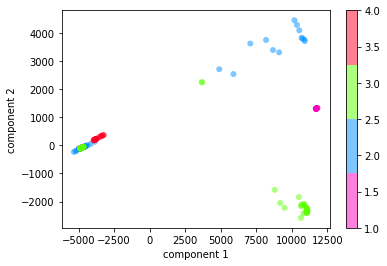

In [72]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=merge['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow_r', 4))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

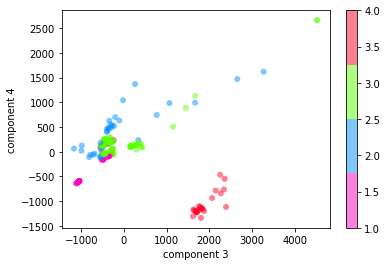

In [70]:
plt.scatter(X_pca[:, 2], X_pca[:, 3],
            c=merge['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow_r', 4))
plt.xlabel('component 3')
plt.ylabel('component 4')
plt.colorbar();

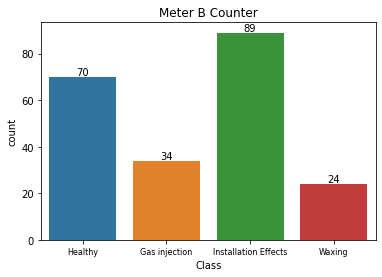

In [75]:
import seaborn as sns
ax = sns.countplot(x=merge['Class'], label="Count") 
ax.bar_label(ax.containers[0]) 
ax.set_xticklabels(['Healthy', 'Gas injection', 'Installation Effects','Waxing'], fontsize=8) 
plt.title('Meter B Counter')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

dataset_used =merge  #df_remove_meterD #df_median_meterD

scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset_used)

y = dataset_used['Class']
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=0)

Highest training accuracy: 1.0
Highest testing accuracy: 1.0
Lowest testing accuracy: 0.9848484848484849


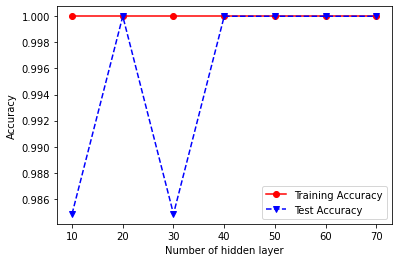

In [39]:
from sklearn.neural_network import MLPClassifier

hidden_layer_sizes = [(10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70)]
trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    clf6 = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='adaptive',random_state=0,max_iter=1000)
    clf6.fit(x_train, y_train)
    Y_predTrain = clf6.predict(x_train)
    Y_predTest = clf6.predict(x_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))
hidden_layer_size=[x[0] for x in hidden_layer_sizes]
plt.plot(hidden_layer_size, trainAcc, 'ro-', hidden_layer_size, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')
print("Highest training accuracy:", max(trainAcc))
print("Highest testing accuracy:", max(testAcc))
print("Lowest testing accuracy:", min(testAcc))

Highest training accuracy: 1.0
Highest testing accuracy: 0.9545454545454546
Lowest testing accuracy: 0.5454545454545454


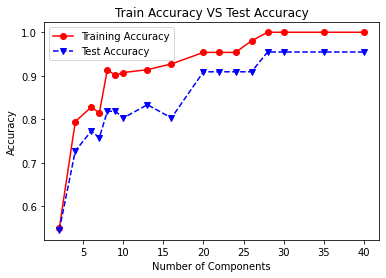

In [41]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

num_components = [2,4,6,7,8,9,10,13,16,20,22,24,26,28,30,35,40]

trainAccuracy = np.zeros(len(num_components))
testAccuracy = np.zeros(len(num_components))

index = 0
for compo in num_components:
    pca = PCA(compo)#n_components=20
    x_pca = pca.fit_transform(dataset_used)
    x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size = 0.3, random_state=0)
    model_pca = LogisticRegression(max_iter=20000,random_state=0)
    model_pca.fit(x_train_pca, y_train)
    
    Y_predTrain = model_pca.predict(x_train_pca)
    Y_predTest = model_pca.predict(x_test_pca)
    
    trainAccuracy[index] = accuracy_score(y_train, Y_predTrain)
    testAccuracy[index] = accuracy_score(y_test, Y_predTest)
    index += 1

# ###########################################################################
# # Plot training and test accuracies
# ##########################################################################
    
plt.plot(num_components,trainAccuracy,'ro-',num_components,testAccuracy,'bv--')
plt.title("Train Accuracy VS Test Accuracy")
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
print("Highest training accuracy:", max(trainAccuracy))
print("Highest testing accuracy:", max(testAccuracy))
print("Lowest testing accuracy:", min(testAccuracy))

Highest training accuracy: 1.0
Highest testing accuracy: 1.0
Lowest testing accuracy: 0.7121212121212122


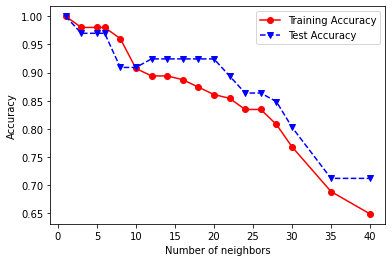

In [42]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1,3,5,6,8,10,12,14,16,18,20,22,24,26,28,30,35,40]#1, 5, 10, 15, 20, 25, 30
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(x_train, y_train)
    Y_predTrain = clf1.predict(x_train)
    Y_predTest = clf1.predict(x_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
print("Highest training accuracy:", max(trainAcc))
print("Highest testing accuracy:", max(testAcc))
print("Lowest testing accuracy:", min(testAcc))